[[55.1        46.1       ]
 [30.83333333 74.66666667]
 [43.2        16.7       ]
 [27.75       55.        ]]


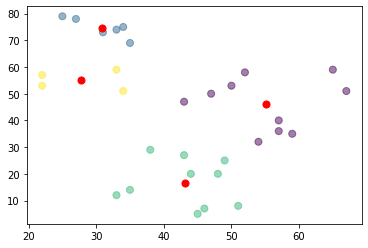

In [37]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Using k-means clustering for image segmentation and to identify dominant color in the image.


1. Use kmeans clustering with k set to 3 and cluster the image

2. Predict the cluster label of every pixel in the image and plot it back as an image.

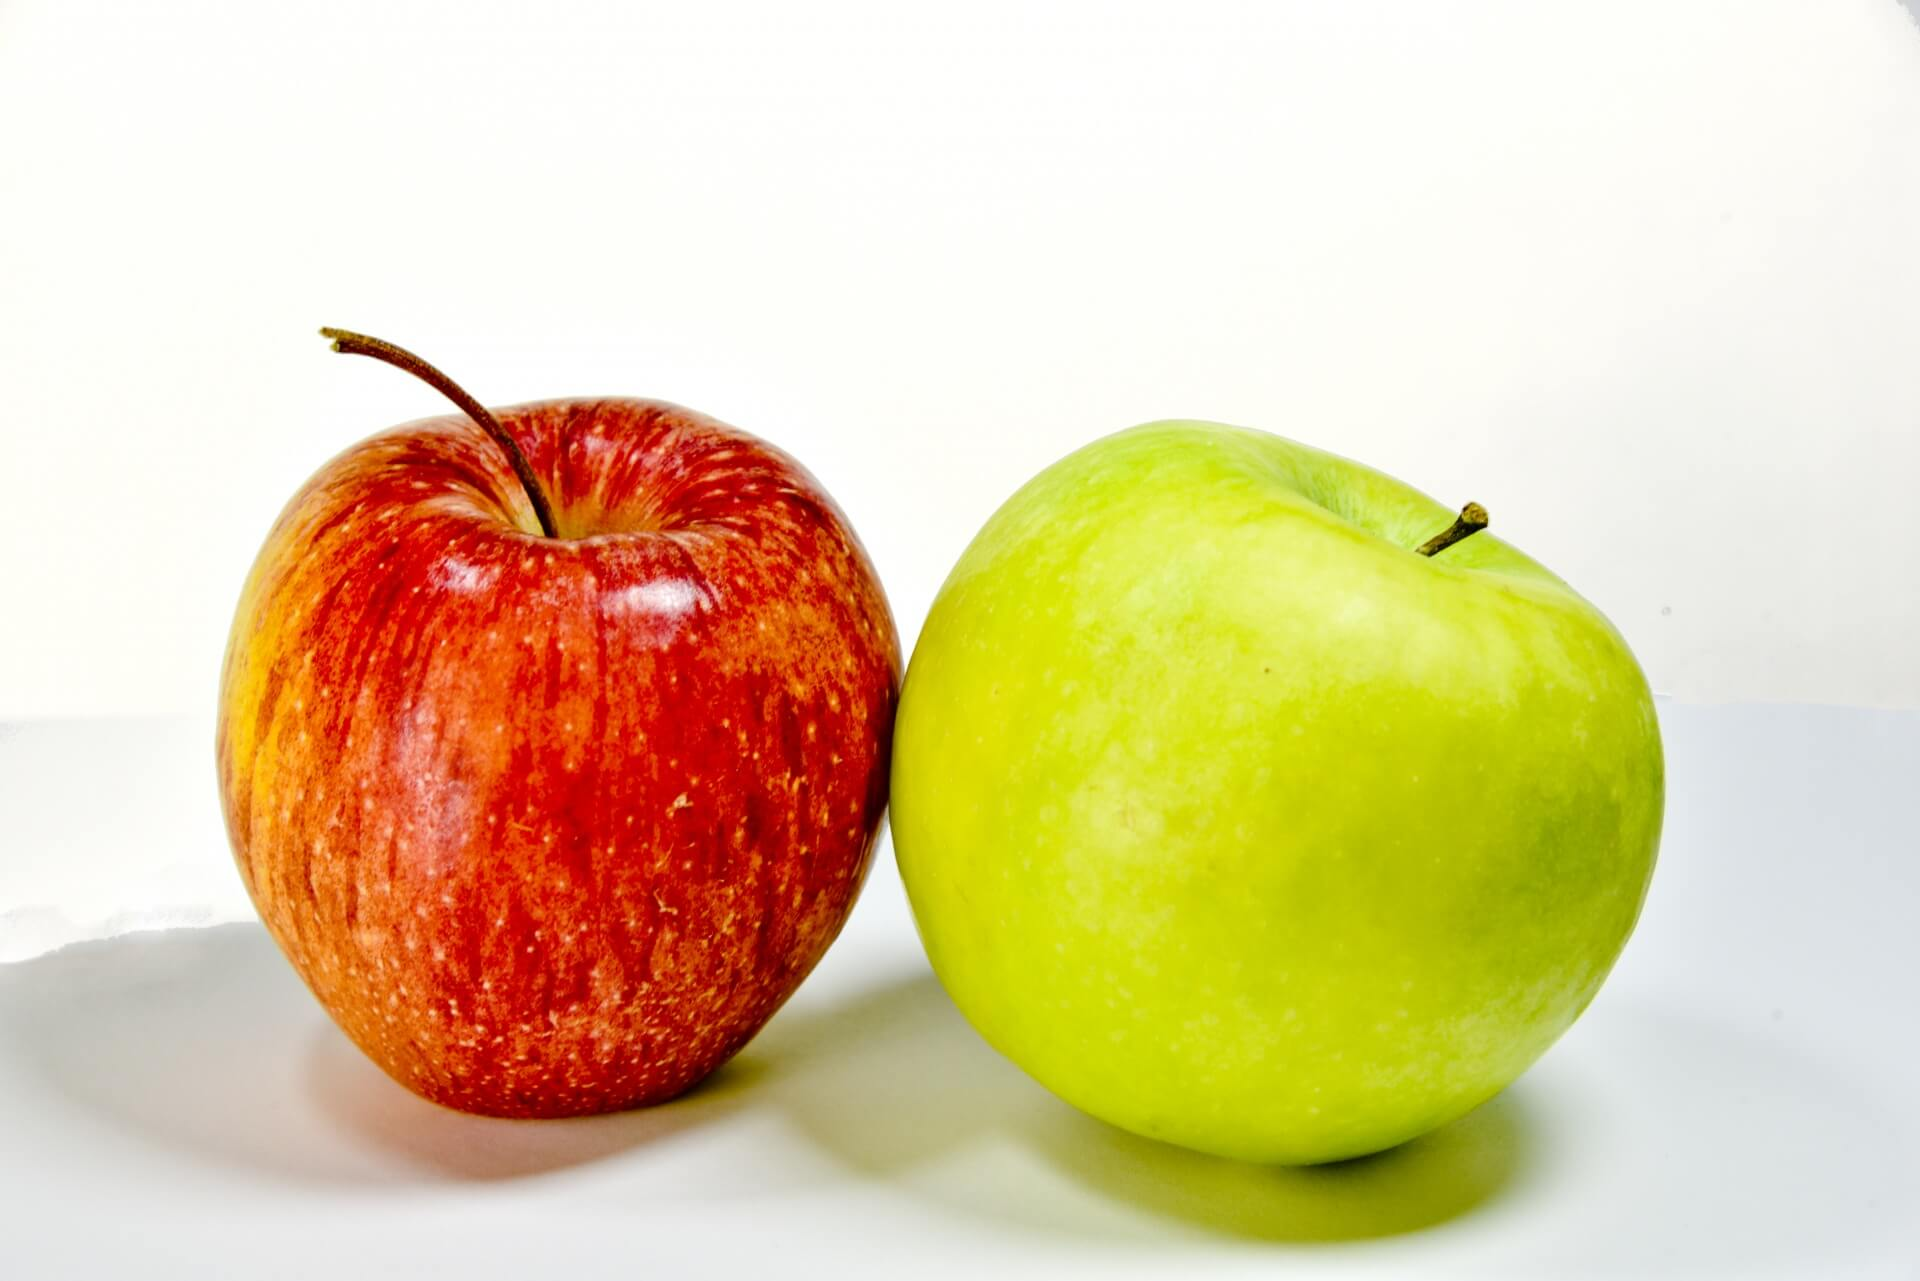

In [24]:
from IPython.display import Image
Image(filename='apples.jpg') 

In [25]:
%matplotlib inline
from PIL import Image
import numpy
im = Image.open("apples.jpg")

np_im = numpy.asarray(im)

print (np_im.shape)

(1281, 1920, 3)


In [26]:
x,y,z=np_im.shape
np_im.resize((x,y*z)) # a 2D array
print (np_im.shape)

(1281, 5760)


In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(np_im)

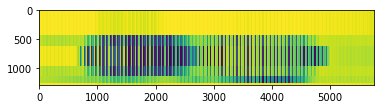

In [35]:
import matplotlib.pyplot as plt
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
#plt.figure(figsize = (10,10))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y*z))